In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import butter, lfilter, freqz

In [5]:
fil = pd.read_csv('hometoschool_gyr.csv')
fil.head()

,time,X_value,Y_value,Z_value
0,0.000,0.00000,0.00000,0.00000
1,0.001,-0.00131,-0.28813,0.03593
2,0.046,0.05121,0.17612,0.10190
3,0.102,0.00601,-0.04134,0.04938
4,0.162,0.01089,-0.01692,0.01395


In [6]:
# We will add two more cols to represent when the device was moving(move) and normalization(norm)
# Since our movement is from the start we will set it to 1 for true.
fil['move'] = 1
fil['norm'] = 0

In [10]:
# Renaming 
fil.columns = ['time', 'x', 'y', 'z','move','norm']

In [12]:
# This will normalize the data
fil['norm'] = np.sqrt(fil['x']**2 + fil['y']**2 + fil['z']**2)
fil.head()

,time,x,y,z,move,norm
0,0.000,0.00000,0.00000,0.00000,1,0.000000
1,0.001,-0.00131,-0.28813,0.03593,1,0.290365
2,0.046,0.05121,0.17612,0.10190,1,0.209820
3,0.102,0.00601,-0.04134,0.04938,1,0.064680
4,0.162,0.01089,-0.01692,0.01395,1,0.024484


In [14]:
# Make sure our device was in motion for the whole duration.
fil['move'].value_counts()/float(len(data))

1    1.0
Name: move, dtype: float64

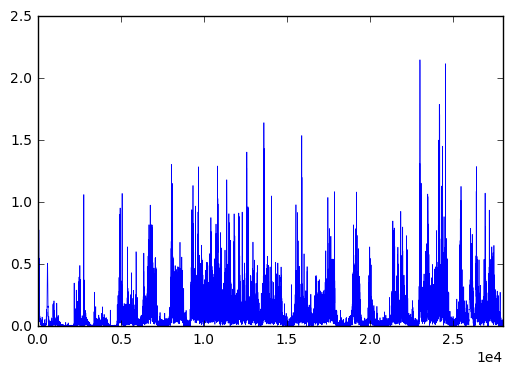

In [16]:
# This is to show the plotting of the normalization of the data on all three axis
plt.plot(fil[fil['move'] == 1]['norm'], linewidth=.5)
plt.xlim(0, len(fil))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Using the Scipy.signal library
We are able import butter, lfilter, and freqz
- butter : Design an Nth order digital or analog Butterworth filter and return the filter coefficients in (B,A) or (Z,P,K) form.
- lfilter : Filter a data sequence, x, using a digital filter.
- freqz : Compute the frequency response of a digital filter.

In [30]:
# Helper functions 
def lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# low pass filter
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Helper function
def highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# High Pass filter
def highpass_filter(data, cutoff, fs, order=5):
    b, a = highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

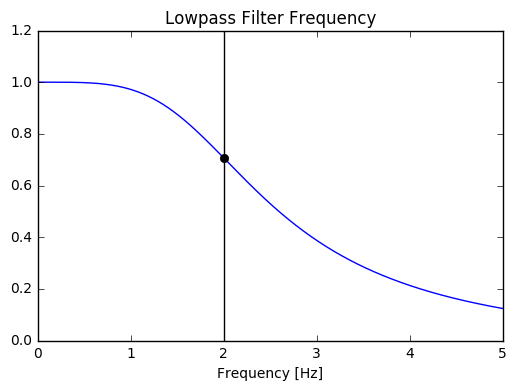

In [25]:
# Filter requirements.(This can be editted depending on the data)
order = 2
fs = 25.0  # sample rate, 
cutoff = 2.     # desired cutoff frequency of the filter, Hz

# filter coefficients
b, a = lowpass(cutoff, fs, order)

# Plotting the freq
w, h = freqz(b, a, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 5)
plt.title("Lowpass Filter Frequency")
plt.xlabel('Frequency [Hz]')

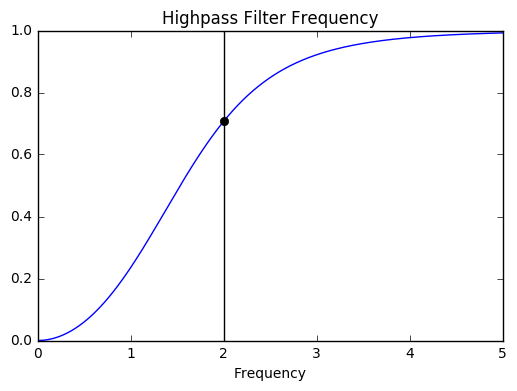

In [27]:
# Filter requirements(This can be changed depending on the data)
order = 2
fs = 25.0  # sample rate,
cutoff = 2.     # desired cutoff frequency of the filter, Hz

#filter coefficents
b, a = highpass(cutoff, fs, order)

# Plotting the freq
w, h = freqz(b, a, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 5)
plt.title("Highpass Filter Frequency")
plt.xlabel('Frequency')

# Lowpass filtering

(0, 27993)

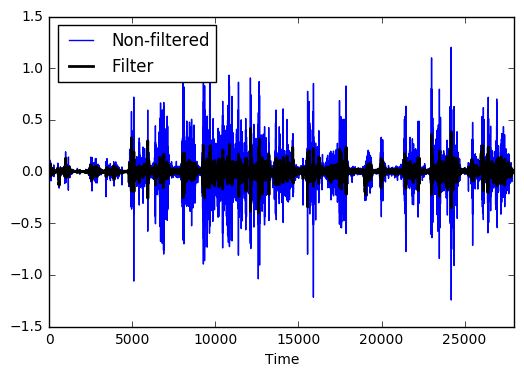

In [32]:
# Test the filter on a sample of the dataset
filter_fil = fil[fil['move'] == 1]['x']
filter_x = range(len(filter_fil))
filter_y = lowpass_filter(filter_fil, cutoff, fs, order)
plt.plot(filter_x, filter_fil, linewidth=1, label='Non-filtered')
plt.plot(filter_x, filter_y, linewidth=2, label='Filter', color = 'black')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.xlim(0, len(filter_fil))

(0, 27993)

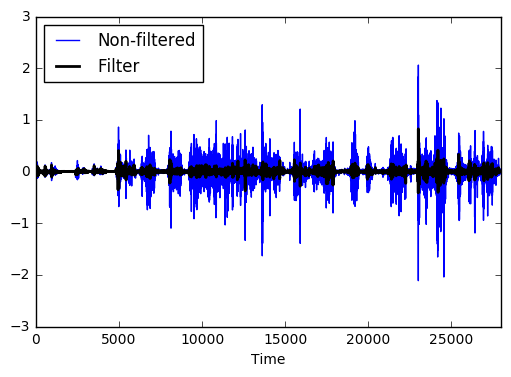

In [33]:
# Test the filter on a sample of the dataset
filter_fil = fil[fil['move'] == 1]['y']
filter_x = range(len(filter_fil))
filter_y = lowpass_filter(filter_fil, cutoff, fs, order)
plt.plot(filter_x, filter_fil, linewidth=1, label='Non-filtered')
plt.plot(filter_x, filter_y, linewidth=2, label='Filter', color = 'black')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.xlim(0, len(filter_fil))

(0, 27993)

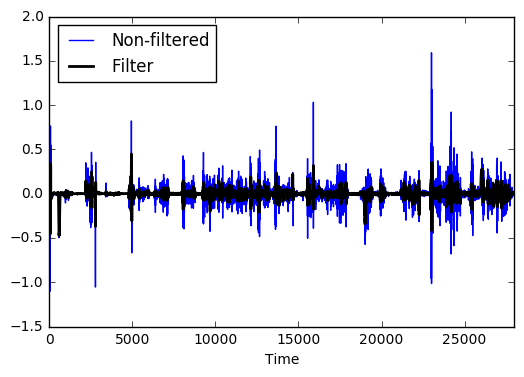

In [35]:
# Test the filter on a sample of the dataset
filter_fil = fil[fil['move'] == 1]['z']
filter_x = range(len(filter_fil))
filter_y = lowpass_filter(filter_fil, cutoff, fs, order)
plt.plot(filter_x, filter_fil, linewidth=1, label='Non-filtered')
plt.plot(filter_x, filter_y, linewidth=2, label='Filter', color = 'black')
plt.xlabel('Time')
plt.legend(loc='upper left')
plt.xlim(0, len(filter_fil))

# Highpass filter